In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

In [164]:
data=pd.read_excel("Retail.xlsx")
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [165]:
data1 = data

In [166]:
#calcul des ventes totales de chaque produit
data1['Total_Price']=data1['Quantity']*data1['UnitPrice']
data1.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08


In [167]:
#enregistrement dans la colonne date du format YYYYMM
data1['date'] = data1['InvoiceDate'].dt.strftime('%Y%m')

In [168]:
#change le type de la colonne date
data1.date = pd.to_numeric(data1.date, errors='coerce')

In [169]:
#verification des valeurs de la colonne date
print(data1['date'].unique())

[201012 201101 201102 201103 201104 201105 201106 201107 201108 201109
 201110 201111 201112]


In [170]:
#repartition des clients par pays
Cust_country=data1[['Country','CustomerID']].drop_duplicates()

In [172]:
Cust_country_count=Cust_country.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending=False)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


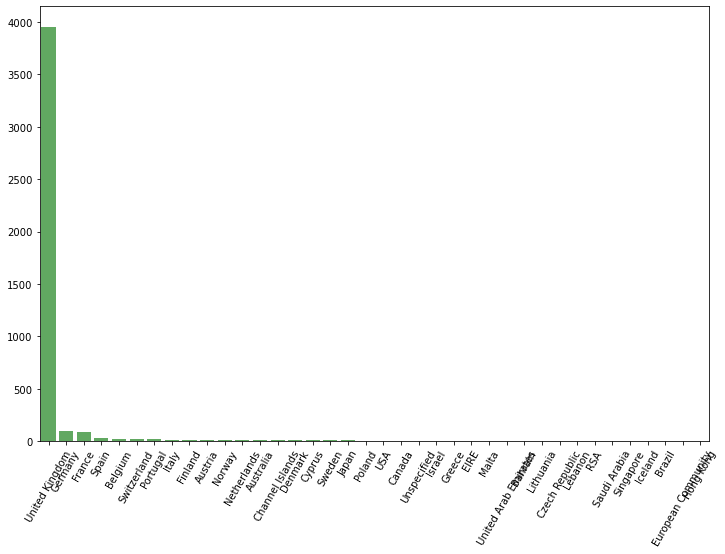

In [173]:
country=list(Cust_country_count['Country'])
Cust_id=list(Cust_country_count['CustomerID'])
plt.figure(figsize=(12,8))
sns.barplot(country, Cust_id, alpha=0.8, color=color[2])
plt.xticks(rotation='60')
plt.show()

In [174]:
#filtre des clients du royaume uni
Cust_date_UK=data1[data1['Country']=="United Kingdom"]
#recuperation des dates distinctes d'achats
Cust_date_UK=Cust_date_UK[['CustomerID','date']].drop_duplicates()
#verif du dataframe
Cust_date_UK

,CustomerID,date
0,17850.0,201012
9,13047.0,201012
46,13748.0,201012
65,15100.0,201012
82,15291.0,201012
...,...,...
541613,14422.0,201112
541628,14446.0,201112
541806,17581.0,201112
541869,15804.0,201112


In [175]:
#fonction qui attribue une note de recence aux clients en fonction de la date d'achat
def f(row):
    if row['date'] > 201110: 
        val = 5
    elif row['date'] <= 201110 and row['date'] > 201108:
        val = 4
    elif row['date'] <= 201108 and row['date'] > 201106:
        val = 3
    elif row['date'] <= 201106 and row['date'] > 201104:
        val = 2
    else:
        val = 1
    return val

In [176]:
#on applique la note sur chaque ligne
Cust_date_UK['Recency_Flag'] = Cust_date_UK.apply(f, axis=1)
#on recupere le client et sa note la plus forte
Cust_date_UK = Cust_date_UK.groupby('CustomerID',as_index=False)['Recency_Flag'].max()

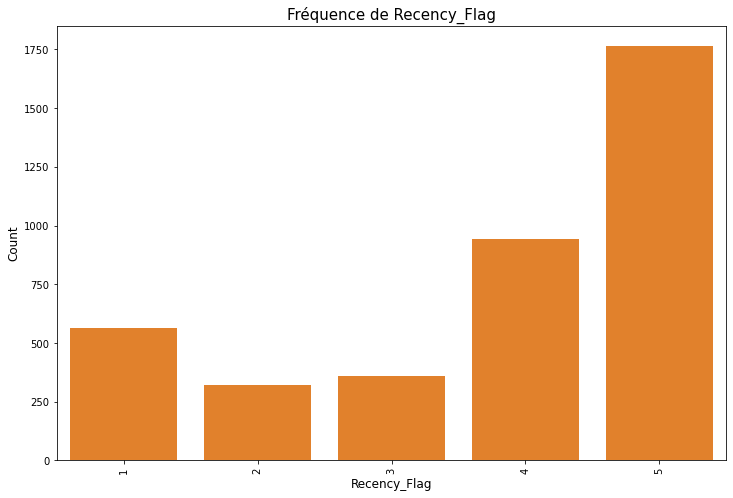

In [177]:
#visualisation
plt.figure(figsize=(12,8))
sns.countplot(x="Recency_Flag", data=Cust_date_UK, color=color[1])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Recency_Flag', fontsize=12)
plt.xticks(rotation='vertical')
plt.title ("Fréquence de Recency_Flag", fontsize=15)
plt.show()

In [178]:
#enregistrement des 3 colonnes pour calcul de Frequence
Cust_freq=data1[['Country','InvoiceNo','CustomerID']].drop_duplicates()

In [179]:
#prise en compte par pays d'un numero de facture distinct par client
Cust_freq_count=Cust_freq.groupby(["Country","CustomerID"])["InvoiceNo"].aggregate("count").reset_index().sort_values('InvoiceNo', ascending=False)

In [180]:
#tri des clients du royaume uni
Cust_freq_count_UK=Cust_freq_count[Cust_freq_count['Country']=='United Kingdom']

In [181]:
#tri des doublons
unique_invoice=Cust_freq_count_UK[['InvoiceNo']].drop_duplicates()

In [182]:
#appel de la fonction qcut pour separer en 5 parties egales
unique_invoice['Freqency_Band'] = pd.qcut(unique_invoice['InvoiceNo'], 5)
unique_invoice=unique_invoice[['Freqency_Band']].drop_duplicates()
unique_invoice

,Freqency_Band
428,"(55.0, 224.0]"
2017,"(38.0, 55.0]"
2031,"(25.0, 38.0]"
4057,"(13.0, 25.0]"
2856,"(0.999, 13.0]"


In [183]:
#fonction qui attribuera une note à chaque ligne en fonction du score obtenu
def f(row):
    if row['InvoiceNo'] <= 13:
        val = 1
    elif row['InvoiceNo'] > 13 and row['InvoiceNo'] <= 25:
        val = 2
    elif row['InvoiceNo'] > 25 and row['InvoiceNo'] <= 38:
        val = 3
    elif row['InvoiceNo'] > 38 and row['InvoiceNo'] <= 55:
        val = 4
    else:
        val = 5
    return val

In [184]:
#on applique la fonction pour calculer la Frequence
Cust_freq_count_UK['Freq_Flag'] = Cust_freq_count_UK.apply(f, axis=1)

<ipython-input-184-bb08849de3e4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cust_freq_count_UK['Freq_Flag'] = Cust_freq_count_UK.apply(f, axis=1)


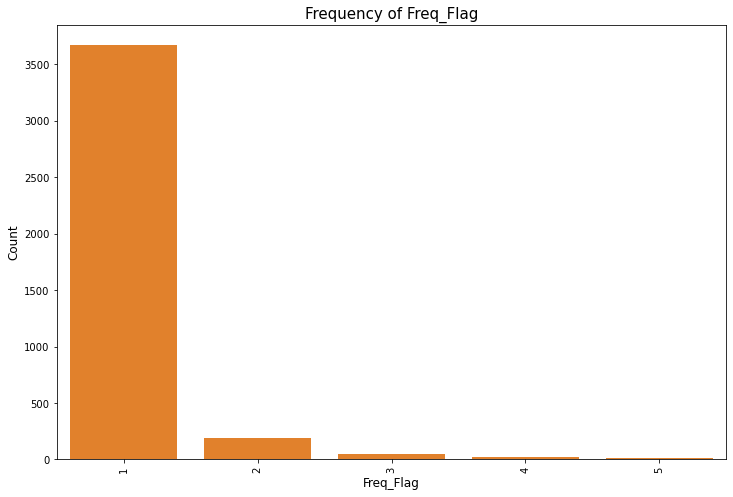

In [185]:
#visualisation
plt.figure(figsize=(12,8))
sns.countplot(x='Freq_Flag', data=Cust_freq_count_UK, color=color[1])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Freq_Flag', fontsize=12)
plt.xticks(rotation='vertical')
plt.title('Frequency of Freq_Flag', fontsize=15)
plt.show()

In [187]:
#calcul des achats monetaire totaux pour chaque client
Cust_monetary = data.groupby(['Country','CustomerID'])['Total_Price'].aggregate('sum').reset_index().sort_values('Total_Price', ascending=False)

In [189]:
#recuperation des clients du royaume uni
Cust_monetary_UK=Cust_monetary[Cust_monetary['Country']=='United Kingdom']

In [190]:
#supprime les doublons
unique_price=Cust_monetary_UK[['Total_Price']].drop_duplicates()

In [191]:
#supprime les valeurs inferieures à 1
unique_price=unique_price[unique_price['Total_Price'] > 0]

In [192]:
#appel de la fonction qcut pour separer en 5 parties égales
unique_price['monetary_Band'] = pd.qcut(unique_price['Total_Price'], 5)

In [193]:
#supprime les doublons
unique_price=unique_price[['monetary_Band']].drop_duplicates()

In [194]:
#verif tableau
unique_price

,monetary_Band
4237,"(1932.504, 256438.49]"
1959,"(892.136, 1932.504]"
930,"(463.248, 892.136]"
1877,"(243.046, 463.248]"
2879,"(-0.0009999999999876, 243.046]"


In [195]:
#fonction qui affectera un score Monetaire par ligne 
def f(row):
    if row['Total_Price'] <= 243:
        val = 1
    elif row['Total_Price'] > 243 and row['Total_Price'] <= 463:
        val = 2
    elif row['Total_Price'] > 463 and row['Total_Price'] <= 892:
        val = 3
    elif row['Total_Price'] > 892 and row['Total_Price'] <= 1932:
        val = 4
    else:
        val = 5
    return val

In [196]:
#on applique la fonction au tableau
Cust_monetary_UK['Monetary_Flag'] = Cust_monetary_UK.apply(f, axis=1)

<ipython-input-196-1f70acfb9b2c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cust_monetary_UK['Monetary_Flag'] = Cust_monetary_UK.apply(f, axis=1)


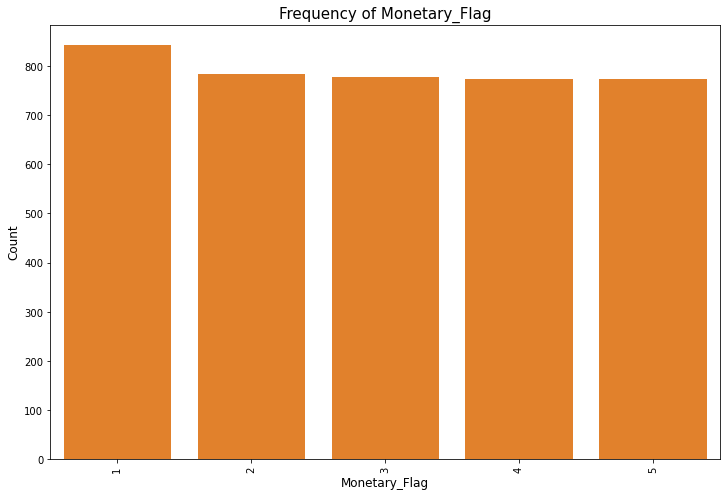

In [197]:
#visualisation
plt.figure(figsize=(12,8))
sns.countplot(x='Monetary_Flag', data=Cust_monetary_UK, color=color[1])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Monetary_Flag', fontsize=12)
plt.xticks(rotation='vertical')
plt.title('Frequency of Monetary_Flag', fontsize=15)
plt.show()

In [198]:
#concatenation du tableau
Cust_UK_All=pd.merge(Cust_date_UK,Cust_freq_count_UK[['CustomerID','Freq_Flag']],on=['CustomerID'],how='left')

In [199]:
#concatenation du tableau
Cust_UK_All=pd.merge(Cust_UK_All,Cust_monetary_UK[['CustomerID','Monetary_Flag']],on=['CustomerID'],how='left')

In [200]:
#verif
Cust_UK_All.head(10)

,CustomerID,Recency_Flag,Freq_Flag,Monetary_Flag
0,12346.0,1,1,1
1,12747.0,5,1,5
2,12748.0,5,5,5
3,12749.0,5,1,5
4,12820.0,5,1,4
5,12821.0,2,1,1
6,12822.0,4,1,4
7,12823.0,4,1,4
8,12824.0,4,1,2
9,12826.0,5,1,4


In [ ]:
#chaque id de client se voit attribuer une note en RFM